In [1]:
import desitarget 
from desitarget.targets import desi_mask, bgs_mask, mws_mask

from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [51]:
! ls /global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS*.ran.fits

/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_0_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_10_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_11_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_12_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_13_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_14_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_15_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_16_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_17_clustering.ran.fits
/global/cfs

In [53]:
! ls /global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS*.dat.fits

/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_S_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits


In [55]:
N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits')

In [54]:
S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits')

In [56]:
#randoms
N0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_N_0_clustering.ran.fits')
S0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_S_0_clustering.ran.fits')

In [57]:
no_randoms = np.shape(N0)[0] + np.shape(S0)[0]
sky_area = 4*np.pi*np.rad2deg(1)**2
print(sky_area)

survey_area = no_randoms / 2500 #randoms / deg^2 - 2500 is random number density?
print(survey_area) # in deg^2
fsky = survey_area/sky_area
print(fsky)

41252.96124941928
1866.4724
0.04524456774666751


In [58]:
S.dtype.names

('TARGETID',
 'Z',
 'NTILE',
 'TILES',
 'RA',
 'DEC',
 'WEIGHT',
 'WEIGHT_ZFAIL',
 'WEIGHT_COMP',
 'WEIGHT_SYS',
 'flux_g_dered',
 'flux_r_dered',
 'flux_z_dered',
 'flux_w1_dered',
 'flux_w2_dered',
 'NZ',
 'WEIGHT_FKP')

In [59]:
data = Table(np.hstack((N,S))) #BGS ANY in N, S combined
data

TARGETID,Z,NTILE,TILES,RA,DEC,WEIGHT,WEIGHT_ZFAIL,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NZ,WEIGHT_FKP
int64,float64,int64,bytes11,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64
39633366047264069,0.23373774756268273,1,20001,268.6773406567538,58.196956322063585,5.642263351520067,1.0164545,5.0,1.1101851747117222,5.1988206,18.016794,36.307766,35.975773,23.484913,0.008160549346013691,0.036596235131862095
39633366047264412,0.2262081883049673,1,20001,268.7121644210125,58.17137871856034,7.864241155855226,1.01196,7.0,1.1101851747117222,5.6451545,17.743734,36.715954,42.338474,30.138641,0.008160549346013691,0.036596235131862095
39633366047264487,0.10750217420934505,1,20001,268.72025843577376,58.150995263304566,2.246647062564488,1.0118344,2.0,1.1101851747117222,65.581665,164.53503,310.0892,251.75818,156.65999,0.026208493705373998,0.011689576566903793
39633366047264710,0.20509598282456507,1,20001,268.7447179685751,58.35164090788789,3.1701678101969413,1.0193987,3.0,1.0366136571704718,9.199382,18.115196,31.323214,38.144897,31.80481,0.011294562687062876,0.026712778718567892
39633366047264297,0.16095951646742163,1,20001,268.7008850398322,58.31651750837625,2.1158721997182197,1.0205693,2.0,1.0366136571704718,7.7169294,16.809292,28.698618,21.945616,12.552565,0.017605465587063433,0.01730292847324051
39633366047265345,0.23282678015147948,1,20001,268.81269831707334,58.142903267925234,1.123869848907434,1.0123265,1.0,1.1101851747117222,5.7025113,20.790937,44.397903,52.077763,37.31693,0.008160549346013691,0.036596235131862095
39633366047265059,0.18293134246555096,1,20001,268.78466388262035,58.36109277746728,1.0559409979905976,1.0186447,1.0,1.0366136571704718,16.68374,31.437498,50.411964,43.284397,33.23363,0.013696817349039502,0.022131370812600925
39633366051456481,0.2921522504545623,1,20001,268.9829065999235,58.3056335434302,2.0610373527184795,1.0173928,2.0,1.0129015286827314,12.465097,30.888058,55.453087,60.664528,37.495365,0.004582895074726721,0.06335522887692997
39633366047265062,0.22913931839469825,1,20001,268.78498910544477,58.22941912184547,2.247230965995287,1.0120974,2.0,1.1101851747117222,9.368853,30.154222,56.5326,57.30369,32.62352,0.008160549346013691,0.036596235131862095


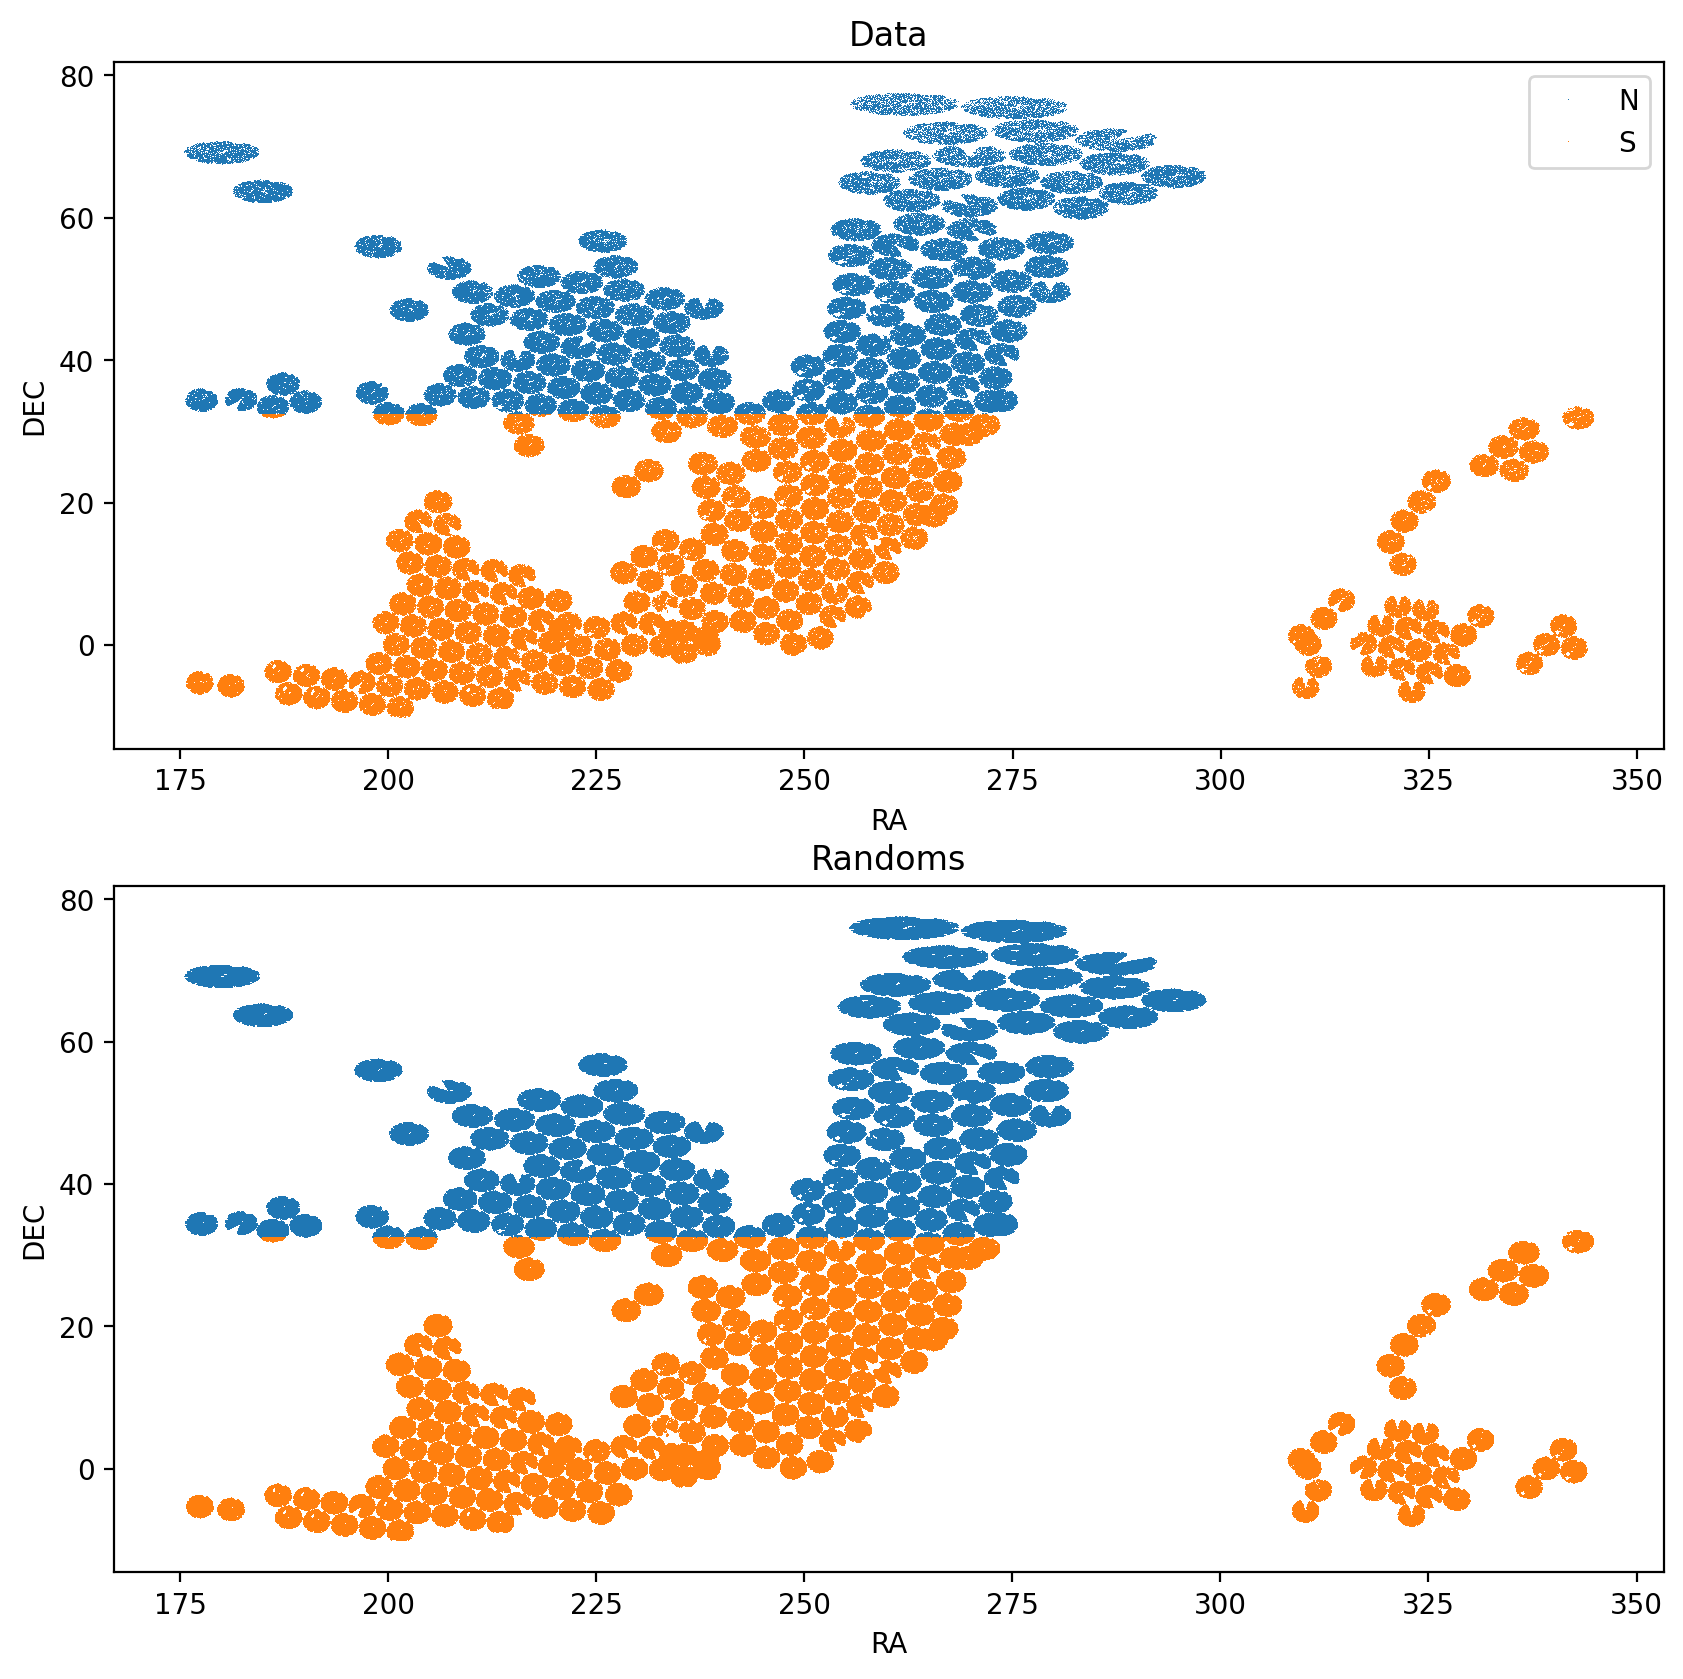

In [64]:
plt.figure(figsize=(10,10), dpi=200)
plt.subplot(211)
plt.title('Data')
plt.plot(N['RA'], N['DEC'], lw=0, marker=',', label='N')
plt.plot(S['RA'], S['DEC'], lw=0, marker=',', label='S')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()
plt.subplot(212)
plt.title('Randoms')
plt.plot(N0['RA'], N0['DEC'], lw=0, marker=',')
plt.plot(S0['RA'], S0['DEC'], lw=0, marker=',')
plt.xlabel('RA')
plt.ylabel('DEC')

plt.savefig('figures/week6/DA02_sky_coverage.png')